<a href="https://colab.research.google.com/github/hamegg320/seaiceextent/blob/main/surface_temperature_MME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Driveに接続させる
from google.colab import drive
drive.mount('/content/drive')

# 作業ディレクトリを移動する　→　そのディレクトリでデータを保存できる
%cd /content/drive/MyDrive/nozue_version/surface_temperature_model/

Mounted at /content/drive
/content/drive/MyDrive/nozue_version/surface_temperature_model


In [2]:
# 作業領域を確認する
%ls

ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc
ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc
ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc


In [3]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.5 MB/s eta 0:00:00


filenames, ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc', 'ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc']
INM-CM5-0	INM-CM5-0	IPSL-CM6A-LR-INCA	
model_dict, {'INM-CM5-0': ['ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_185001-194912.nc', 'ts_Amon_INM-CM5-0_historical_r1i1p1f1_gr1_195001-201412.nc'], 'IPSL-CM6A-LR-INCA': ['ts_Amon_IPSL-CM6A-LR-INCA_historical_r1i1p1f1_gr_185001-201412.nc']}


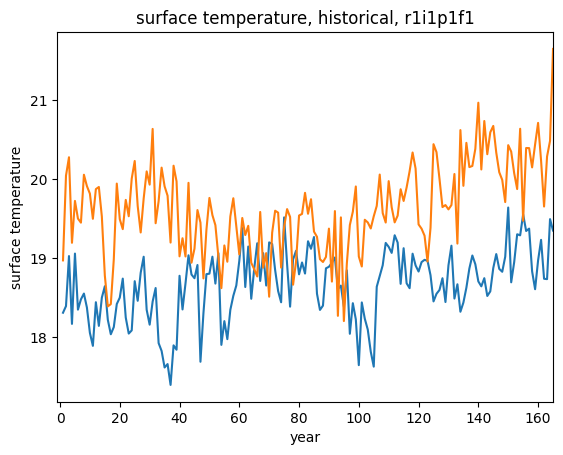

In [5]:
### Import modules
import os
import csv
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt

ensemble="r1i1p1f1" #指定するアンサンブル

### Store file names by model names into directory
model_dict = {}
filenames = sorted(os.listdir()) #場所をcdでseaice_modelにしているからその中のデータを並び替えている。年代順・アンサンブル順にも
print("filenames,", filenames)

##########################アンサンブルを揃えたマルチモデルの場合の変更点###############################
for filename in filenames:
  
  if filename.split('_')[4] in ensemble:
    model_name = filename.split('_')[2] #並び替えた文字列をsplitで_の2個目で分割　例)siextentn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc
    
    print(model_name, end = '\t')
    
    if model_name not in model_dict:    #並び替えた文字列がディクショナリにない場合
      model_dict[model_name] = [filename] #分割されたモデルもいれることができる。keyに対してvalueは複数可能
    else:
      model_dict[model_name].append(filename) #ディクショナリのキーに2個目で分割した文字列を入れる。

print("")
print("model_dict,",model_dict)

############################################################################

### Plot average of sea ice extent every model
# store sea ice extent throughout all the years by models
for model_name, files in model_dict.items(): #ディレクトリ内をループのため、itms method
  sum_surface = []

  for file in files: #ディクショナリのvalueの部分がfileになっているため
    #print(file) データは分かれている。

    ds = Dataset(file, mode='r',format="NETCDF4")
    run_time = len(ds['time']) #timeのもの
    lat = ds['lat'][:]
    lon=  ds['lon'][:]

##################追加コード########################
    ###東京の場合　北緯36度、東経140度
    point_lat=36 
    point_lon=140
    point_lon=point_lon+180
    new_lat=0
    new_lon=0
    count_lat=0
    count_lon=0

    for y in range(len(lat)):
      if  lat[y] > (point_lat-1) and lat[y] < (point_lat+1):
        if count_lat >= 1:
          if point_lat - lat[y] > point_lat - lat[new_lat] :
            new_lat=new_lat
          else:
            new_lat=y
        else:
          new_lat = y
        #print(lat[y],"!") #北緯35.492958
        count_lat+=1
      else:
        pass

    for x in range(len(lon)):
      if  lon[x] > (point_lon-1) and lon[x] < (point_lon+1):
        if count_lon >= 1:
          if point_lon - lon[x] > point_lon - lon[new_lon] :
            new_lon=new_lon
          else:
            new_lat=x
        else:
          new_lon = x
        count_lon+=1
          #print(lon[x]-180,"$") #東経140
      else:
        pass
        
    for i in range(run_time):
      if len(ds['ts'].dimensions) > 1: #dsのdimensionが1つ以上
        sum_surface.append(ds["ts"][i][new_lat][new_lon]-273.15)
      else:
        sum_surface.append(ds['ts'][i])
##################################################

  #lists & variables
  temperature_map = []
  year_map = []
  count = 0
  sum = 0
  ave = 0
    
  # calculate average of sea ice extent every year
  for i in range(len(sum_surface)):
    sum += sum_surface[i]
    count += 1
    
    if count % 12 == 0:
      ave = sum / 12
      temperature_map.append(ave)
      sum = 0
    
  for i in range(len(temperature_map)):
    year_map.append(i+1)

  #plt.figure(figsize=(6, 6)
  plt.plot(year_map,temperature_map)
 # plt.ylim(9.0,15.5)
  plt.xlim(-1,165)
plt.ylabel('surface temperature')
plt.title(f'surface temperature, historical, {ensemble}') 
plt.xlabel('year')
plt.show()   